## Importación de librerías

In [1]:
# Data processing
# -----------------------------------------------------------------------
import pandas as pd

# Visualization  
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and evaluation  
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Regression models  
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

# Metrics  
# -----------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Carga de datos

In [2]:
df = pd.read_csv('df_clasificacion.csv', index_col=0)
df.head()

,Education,EducationField,Age,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,Country,Attrition,BusinessTravel,...,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.713302,0.0,0.023810,0.000000,0.000000,0.025,0.111111,0.072464,1.0,0.666667,...,0.401442,0.503333,0.590444,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.541380,1.0,0.285714,0.000000,0.000000,0.100,0.777778,0.246377,0.0,0.000000,...,0.217757,0.488092,0.590444,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.541380,0.4,0.095238,0.000000,0.000000,0.100,0.000000,0.811594,0.0,0.666667,...,0.217757,0.488092,0.588986,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.541380,1.0,0.571429,0.076923,0.294118,0.550,0.111111,0.550725,0.0,0.666667,...,0.217757,0.000000,0.588986,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.404025,0.4,0.428571,0.000000,0.411765,0.425,0.333333,0.782609,0.0,0.666667,...,0.217757,0.000000,0.617850,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Separación del conjunto de datos

In [3]:
# Variable objetivo
tv = 'Attrition'

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [6]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (1176, 26)
Tamaño del conjunto de prueba: (294, 26)


## Entrenamiento del modelo

In [ ]:
# Crear una instancia de LogisticRegression
model = LogisticRegression(penalty='l2', C=1.0,  max_iter=200)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [8]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

In [16]:
# Obtener probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

## Validación del modelo

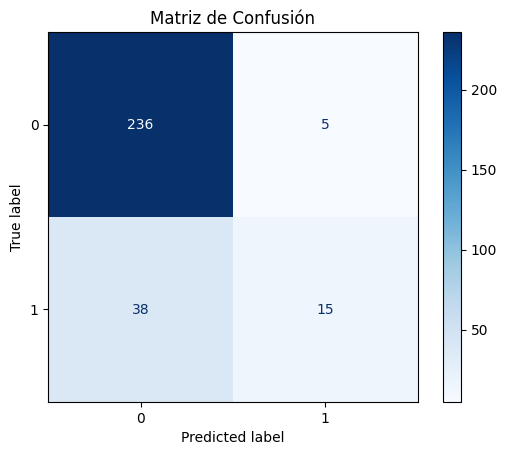

In [19]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

## Métricas

In [22]:
# Calcular predicciones para el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Obtener las probabilidades de predicción
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

In [23]:
# Cálculo de métricas
metrics = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred),
        "Recall": recall_score(y_train, y_train_pred),
        "F1-score": f1_score(y_train, y_train_pred),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1-score": f1_score(y_test, y_test_pred),
    },
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T

In [26]:
df_metrics.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.87,0.74,0.30,0.43
test,0.85,0.75,0.28,0.41


In [29]:
# Cálculo de métricas con desbalanceo
metrics_weighted = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1-score": f1_score(y_train, y_train_pred, average="weighted"),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_test_pred, average="weighted"),
    },
}

# Mostrar métricas en un DataFrame
df_metrics_weighted = pd.DataFrame(metrics_weighted).T


In [30]:
df_metrics_weighted.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.87,0.86,0.87,0.85
test,0.85,0.84,0.85,0.83


## Importancia de características

In [31]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False, key=abs)  # Ordenar por magnitud

In [32]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
16,JobInvolvement,1.745984
18,RelationshipSatisfaction,1.413804
11,JobRole,1.408570
3,YearsSinceLastPromotion,1.233045
17,JobSatisfaction,1.091956
6,NumCompaniesWorked,1.051017
2,Age,-1.024367
15,EnvironmentSatisfaction,0.973716
4,YearsWithCurrManager,-0.953786
5,TotalWorkingYears,-0.876007


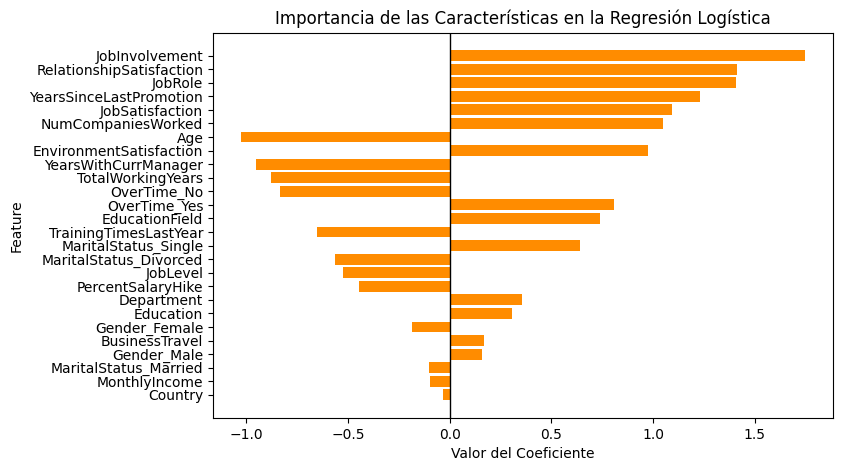

In [33]:
# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='darkorange')
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Feature")
plt.title("Importancia de las Características en la Regresión Logística")
plt.axvline(0, color='black', linewidth=1)  # Línea en el 0 para referencia
plt.gca().invert_yaxis()  # Invertir eje para que la más importante esté arriba
plt.show()

## Entrenamiento final

In [ ]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
model_final = LogisticRegression(penalty='l2', C=1.0,  max_iter=200,  n_jobs=-1)
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "modelo_clasificacion.pkl")

---

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir modelos de regresión logística con regularización
models = {
    "Logistic (L2 - Ridge)": LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    "Logistic (L1 - Lasso)": LogisticRegression(penalty='l1', C=0.1, solver='liblinear'),
    "Logistic (ElasticNet)": LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga'),
}

# Inicializar diccionario para métricas
metrics_results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas ponderadas
    metrics_results[name] = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train Precision (Weighted)": precision_score(y_train, y_train_pred, average='weighted'),
        "Train Recall (Weighted)": recall_score(y_train, y_train_pred, average='weighted'),
        "Train F1 (Weighted)": f1_score(y_train, y_train_pred, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision (Weighted)": precision_score(y_test, y_test_pred, average='weighted'),
        "Test Recall (Weighted)": recall_score(y_test, y_test_pred, average='weighted'),
        "Test F1 (Weighted)": f1_score(y_test, y_test_pred, average='weighted'),
    }

# Convertir métricas a DataFrame
df_metrics = pd.DataFrame(metrics_results).T

In [35]:
df_metrics.round(2)

,Train Accuracy,Train Precision (Weighted),Train Recall (Weighted),Train F1 (Weighted),Test Accuracy,Test Precision (Weighted),Test Recall (Weighted),Test F1 (Weighted)
Logistic (L2 - Ridge),0.87,0.86,0.87,0.85,0.85,0.84,0.85,0.82
Logistic (L1 - Lasso),0.85,0.86,0.85,0.79,0.82,0.76,0.82,0.74
Logistic (ElasticNet),0.86,0.85,0.86,0.80,0.83,0.82,0.83,0.77
